# Connect database

In [36]:
import os
import numpy as np
from matplotlib import pyplot as plt
import datajoint as dj
import h5py
import sys


cwd = !pwd
cwd = cwd[0]

#Add the directory containing utils_data_extraction.py to the Python path
sys.path.append(os.path.abspath(f'{cwd}/GitRepos/jaxley_rgc/'))
save_dir = cwd + '/GitRepos/jaxley_rgc/'


In [7]:
import jax
print(jax.devices())

[CudaDevice(id=0)]


In [37]:
username = !whoami
username = username[0]

home_directory = os.path.expanduser("~")
print(username,home_directory)
 
# Set config file
config_file = f'{home_directory}/datajoint/dj_{username}_conf.json'
assert os.path.isfile(config_file), f'Set the path to your config file: {config_file}'

# Path to djimaging
path_to_djimaging = f'{home_directory}/GitRepos/s-on-alpha-regional/code/AlphaDjimaging/djimaging'





ssuhai /gpfs01/euler/User/ssuhai


In [38]:
from djimaging.user.alpha.utils import database

# set schema name
schema_name = 'ageuler_joesterle_alpha_ca'

indicator = 'calcium'
# indicator = 'glutamate'
database.connect_dj(indicator=indicator)

[2025-01-15 18:57:44,445][WARNING]: MySQL server has gone away. Reconnecting to the server.


schema_name: ageuler_joesterle_alpha_ca
dataset: calcium


# Import morphology data

In [8]:
df_morph = database.get_morph_df()
df_morph.head(2)

,,soma_xyz,df_paths,density_map,density_map_extent,density_center,ventral_dorsal_pos,temporal_nasal_pos,swc_path,hull_points,hull_area_um2,hull_cdia_um,cell_tag,group
date,exp_num,,,,,,,,,,,,,
2018-06-10,1,"[167.57823, 171.56819, 24.0]","{'type': {0: 1, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, ...","[[2.248018e-25, 1.312749e-24, 7.135148e-24, 3....","[-12.421767, 347.57825, -8.431809, 351.56818]","[170.67024, 167.65564]",0.395487,-0.135451,/gpfs01/euler/data/Data/Ran/20180610/1/Raw/wDa...,"[[57.85438996553421, 260.01225835084915], [31....",55076.2,264.812,d2,d
2020-05-10,1,"[179.54811, 175.55815, 26.0]","{'type': {0: 1, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, ...","[[1.5046627e-22, 5.6347575e-22, 1.9469368e-21,...","[-0.4518932, 359.5481, -4.441851, 355.55814]","[156.63153, 171.93057]",0.771130,-0.146780,/gpfs01/euler/data/Data/Ran/20200510/1/Raw/wDa...,"[[77.13918662071228, 274.6421040892601], [35.2...",50290.8,253.046,d3,d


In [32]:
#TODO get location of cell from path strings in df something like this
df_morph['swc_path']
cell_selection = [
    dict(date="2020-06-08", exp_num=1),
    dict(date="2020-05-11", exp_num=1),
]


'/gpfs01/euler/data/Data/Ran/20180610/1/Raw/wDataCh0-exported-000.swc'

In [1]:
import jaxley as jx
from jaxley.synapses import IonotropicSynapse
import matplotlib.pyplot as plt

In [34]:
jx.read_swc?

Signature: jx.read_swc(*args, **kwargs)
Docstring: <no docstring>
File:      ~/GitRepos/jaxley/jaxley/utils/misc_utils.py
Type:      function

In [35]:
# import swc file into jx.Cell object
path_to_morph = '/gpfs01/euler/User/ssuhai/GitRepos/s-on-alpha-regional/data/Ran/sONa_calcium/20180610/1/Raw/wDataCh0-exported-000.swc'
cell = jx.read_swc(path_to_morph, ncomp=8,min_radius=0.01)  # Use eight compartments per branch.

# print shape (num_branches, num_comps)
print(cell.shape)

cell.show()

(90, 720)


,local_comp_index,global_comp_index,local_branch_index,global_branch_index,local_cell_index,global_cell_index
0,0,0,0,0,0,0
1,1,1,0,0,0,0
2,2,2,0,0,0,0
3,3,3,0,0,0,0
4,4,4,0,0,0,0
...,...,...,...,...,...,...
715,3,715,89,89,0,0
716,4,716,89,89,0,0
717,5,717,89,89,0,0
718,6,718,89,89,0,0


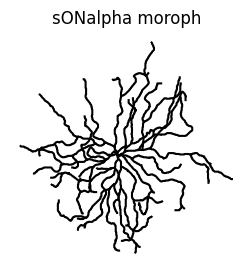

In [37]:
# visualize the cell
cell.vis()
plt.axis("off")
plt.title("sONalpha moroph")
plt.show()

# get the noise stimulus trace 

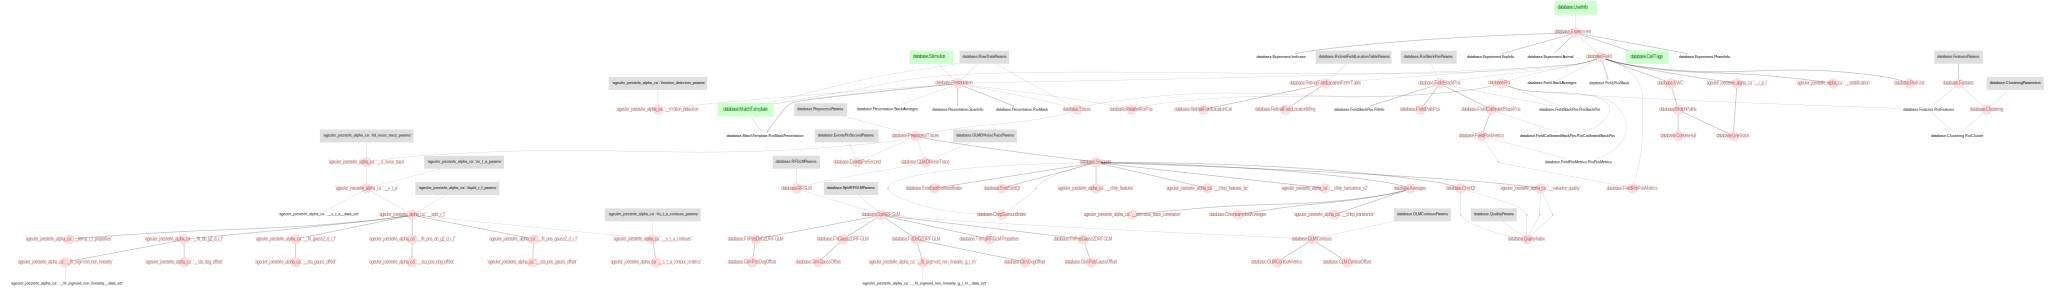

In [7]:
#dir(database)
dj.ERD(database)
#dir(database.Stimulus)


In [5]:

#from utils_data_extraction import get_stimulus_array, extract_simulus_trigg_path


def extract_simulus_trigg_path(
    pres_query = database.Presentation(),
    date = "2020-07-08",
    stim_name = "noise_1500",
    field = "d1",
    exp_num = "1"
):
    
    #database.Presentation() & 'date="2020-07-08"' & 'stim_name="noise_1500"' & 'field="D1"'
    processed_query = pres_query & f'date="{date}"' & f'exp_num="{exp_num}"' & f'stim_name="{stim_name}"' & f'field="{field}"'
    data_dict = processed_query.fetch1()
    
    return (data_dict['triggertimes'],data_dict['h5_header'])


def get_stimulus_array(path):
    '''Extracts stim array from .h5 '''

    assert os.path.isfile(path)
    with h5py.File(path, "r") as f:
        noise_stimulus = f['NoiseArray3D'][:].T.astype(int)
    return noise_stimulus


path_to_stim = '/gpfs01/euler/data/Data/Ran/20200708/1/Pre/SMP_C1_d1_Dnoise.h5'

trig_ts,h5_path = extract_simulus_trigg_path()

noise_stimulus = get_stimulus_array(h5_path)


noise_stimulus.shape

(1500, 20, 15)

In [16]:
def print_h5_structure(name, obj):
    print(name)

with h5py.File(path_to_stim, "r") as f:
    f.visititems(print_h5_structure)

GeoC
NoiseArray3D
OS_Parameters
ROIs
Traces0_raw
Traces0_znorm
Tracetimes0
Triggertimes
Triggervalues
wDataCh0
wDataCh1
wDataCh2
wParamsNum
wParamsStr


In [50]:
# To compute receptive fields, the noise stimulus trace must be loaded and set!



print(noise_stimulus.shape)

(1500, 20, 15)


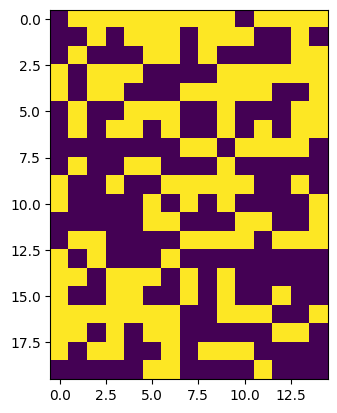

In [83]:
plt.imshow(noise_stimulus[1])

# Get the Ca2+ traces

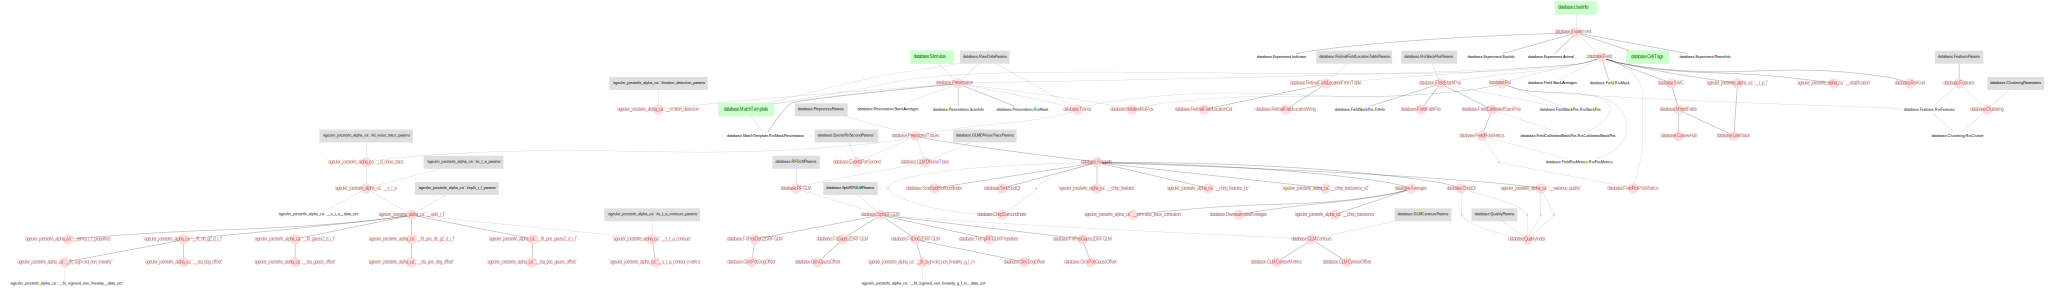

In [86]:
dj.ERD(database)

In [22]:
database.Traces() & 'date="2020-07-08"'

experimenter name of the experimenter,date date of recording,exp_num experiment number in a day,field string identifying files corresponding to field,stim_name Unique string identifier,raw_id unique param set id,cond1 cond1 (pharmacological or other),roi_id integer id of each ROI,trace array of raw trace,trace_times numerical array of trace times,trace_flag Are values in trace correct (1) or not (0)?,trigger_flag Are triggertimes inside trace_times (1) or not (0)?
Ran,2020-07-08,1,d1,gChirp,1,control,1,=BLOB=,=BLOB=,1,1
Ran,2020-07-08,1,d1,gChirp,1,control,2,=BLOB=,=BLOB=,1,1
Ran,2020-07-08,1,d1,gChirp,1,control,3,=BLOB=,=BLOB=,1,1
Ran,2020-07-08,1,d1,gChirp,1,control,4,=BLOB=,=BLOB=,1,1
Ran,2020-07-08,1,d1,gChirp,1,control,5,=BLOB=,=BLOB=,1,1
Ran,2020-07-08,1,d1,gChirp,1,control,6,=BLOB=,=BLOB=,1,1
Ran,2020-07-08,1,d1,gChirp,1,control,7,=BLOB=,=BLOB=,1,1
Ran,2020-07-08,1,d1,gChirp,1,control,8,=BLOB=,=BLOB=,1,1
Ran,2020-07-08,1,d1,lChirp,1,control,1,=BLOB=,=BLOB=,1,1
Ran,2020-07-08,1,d1,lChirp,1,control,2,=BLOB=,=BLOB=,1,1


In [27]:
database.Traces() & 'date="2020-07-08"'# & 'roi_id="1"'
trace_query = database.Traces()
date = "2020-07-08"
stim_name = "noise_1500"
field = "d1"
exp_num = "1"
roi_id = "1"



experimenter name of the experimenter,date date of recording,exp_num experiment number in a day,field string identifying files corresponding to field,stim_name Unique string identifier,raw_id unique param set id,cond1 cond1 (pharmacological or other),roi_id integer id of each ROI,trace array of raw trace,trace_times numerical array of trace times,trace_flag Are values in trace correct (1) or not (0)?,trigger_flag Are triggertimes inside trace_times (1) or not (0)?
Ran,2020-07-08,1,d1,noise_1500,1,control,1,=BLOB=,=BLOB=,1,1


In [28]:
#traces = (database.Traces() & 'date="2018-06-10"' & 'stim_name="noise_2500"' & 'roi_id=1' & 'field="D1"').fetch1()
#len(traces['trace_times'])
#len(noise_presentations['triggervalues'])

def get_ca_trace_ts(
    trace_query = database.Traces(),
    date = "2020-07-08",
    stim_name = "noise_1500",
    field = "d1",
    exp_num = "1",
    roi_id = "1"

):
    
    #database.Presentation() & 'date="2020-07-08"' & 'stim_name="noise_1500"' & 'field="D1"'
    processed_query = trace_query & f'date="{date}"' & f'exp_num="{exp_num}"' & f'stim_name="{stim_name}"' & f'field="{field}"' & f'roi_id="{roi_id}"'

    data_dict = processed_query.fetch1()
    
    return (data_dict['trace'],data_dict['trace_times'])

trace,ts_trace = get_ca_trace_ts()

10284


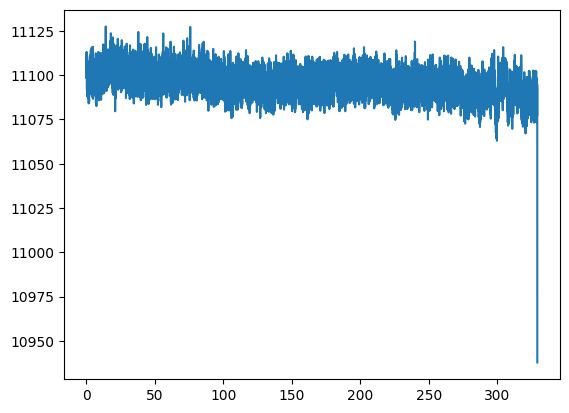

In [30]:
print(len(trace))
plt.plot(ts_trace,trace)

In [31]:
import pickle
meta_data ={'date':"2020-07-08"}
with open ('extracted_data.pkl','wb') as file:
    #pickle.dump(noise_stimulus,trig_ts,trace,ts_trace,meta_data)

TypeError: dump() takes at most 3 positional arguments (5 given)

# ROI info 

In [24]:
database.RelativeRoiPos() & 'date="2018-06-10"' & 'stim_name="noise_2500"' & 'roi_id=1' & 'field="D1"'

experimenter name of the experimenter,date date of recording,exp_num experiment number in a day,field string identifying files corresponding to field,stim_name Unique string identifier,raw_id unique param set id,cond1 cond1 (pharmacological or other),roi_id integer id of each ROI,roi_dx_um,roi_dy_um,roi_d_um
Ran,2018-06-10,1,D1,gChirp,1,control,1,8.78891,12.9722,15.6692
Ran,2018-06-10,1,D1,gChirp,1,control,2,-3.72408,-9.40312,10.1137
Ran,2018-06-10,1,D1,gChirp,1,control,3,-1.43412,-4.77985,4.99036
Ran,2018-06-10,1,D1,gChirp,1,control,4,8.99632,8.76717,12.5617
Ran,2018-06-10,1,D1,gChirp,1,control,5,1.42185,0.807776,1.63528
Ran,2018-06-10,1,D1,gChirp,1,control,6,0.349065,-1.90734,1.93902
Ran,2018-06-10,1,D1,gChirp,1,control,7,4.40437,4.01842,5.96206
Ran,2018-06-10,1,D1,gChirp,1,control,8,-5.74329,-13.2313,14.424
Ran,2018-06-10,1,D1,gChirp,1,control,9,-5.77819,-7.48221,9.45362
Ran,2018-06-10,1,D1,lChirp,1,control,1,8.78891,12.9722,15.6692
